In [1]:
import numpy as np
import pandas as pd
import os
import cv2
from tqdm import tqdm
from PIL import Image
import tensorflow as tf
from keras.models import Sequential
from keras.utils import plot_model 
from keras.layers import Dense,LeakyReLU,BatchNormalization,Dropout,Reshape,Conv2D,Conv2DTranspose,Flatten
import matplotlib.pyplot as plt

2025-06-20 15:15:55.502113: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750412755.513742   32098 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750412755.517336   32098 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750412755.527097   32098 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750412755.527111   32098 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750412755.527112   32098 computation_placer.cc:177] computation placer alr

In [2]:
root_path = "/home/rtx/GAN'S/archive/cropped"
batch_size = 64
img = []

In [3]:
for file in os.listdir(root_path):
    img.append(os.path.join(root_path,file))

In [4]:
from PIL import Image
import numpy as np
from tqdm import tqdm

def data(img_paths):
    images = []
    for file in tqdm(img_paths):
        image = Image.open(file).convert("RGB")  
        image = image.resize((64, 64))
        image = np.array(image).astype(np.float32)
        image = (image / 127.5) - 1 
        images.append(image)

    return np.array(images)


In [5]:
train = data(img)

100%|██████████| 9877/9877 [00:09<00:00, 1026.96it/s]


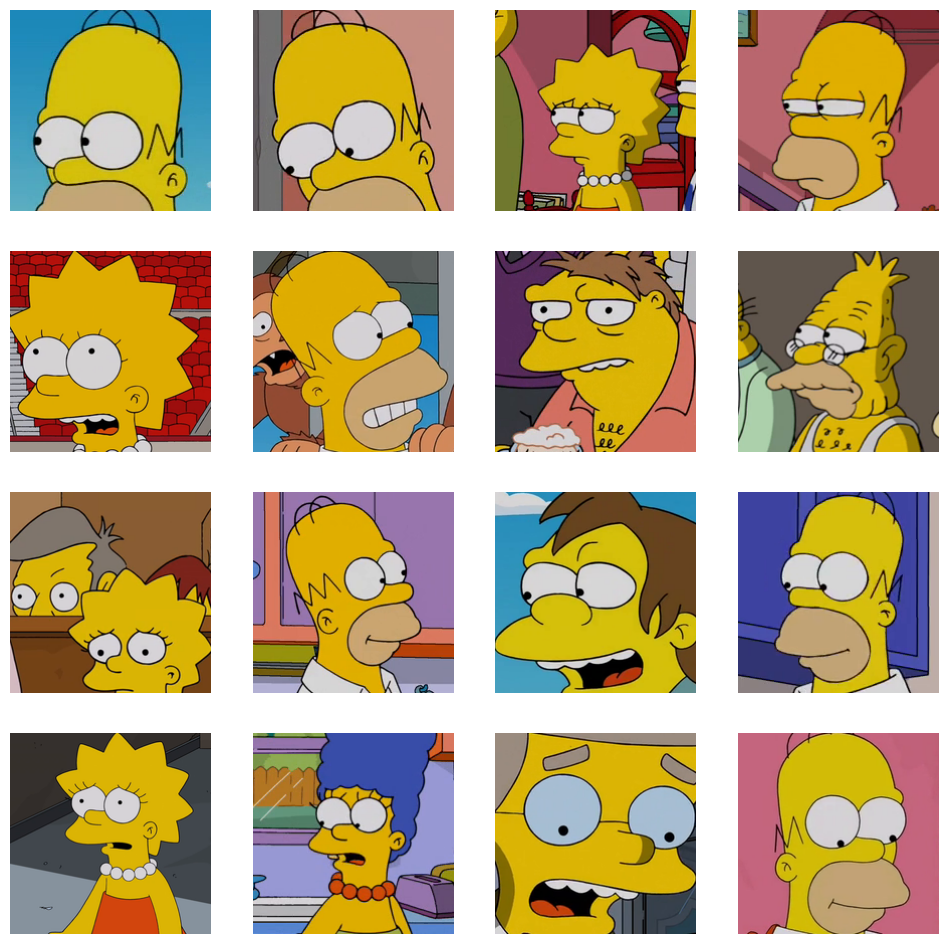

In [6]:
import matplotlib.pyplot as plt

def visualize(img):
    fig, ax = plt.subplots(4, 4, figsize=(12, 12))
    idx = 0
    for i in range(4):
        for j in range(4):
            img_array = np.array(Image.open(img[idx]))
            ax[i, j].imshow(img_array)
            ax[i, j].axis("off")
            idx += 2
    plt.show()

visualize(img)

In [7]:
batch_size = 64
noise_size = 100
epochs = 170

In [8]:
train.shape

(9877, 64, 64, 3)

In [9]:
generator = Sequential()
generator.add(Dense(4*4*512, input_dim=noise_size))
generator.add(Reshape((4, 4, 512))) 
 
generator.add(Conv2DTranspose(256, kernel_size=5, strides=2, padding="same"))
generator.add(BatchNormalization())
generator.add(LeakyReLU(0.2))

generator.add(Conv2DTranspose(128, kernel_size=5, strides=2, padding="same"))
generator.add(BatchNormalization())
generator.add(LeakyReLU(0.2))

generator.add(Conv2DTranspose(64, kernel_size=5, strides=2, padding="same"))
generator.add(BatchNormalization())
generator.add(LeakyReLU(0.2))

generator.add(Conv2DTranspose(3, kernel_size=5, strides=2, padding="same", activation="tanh"))


/home/rtx/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1750412767.691941   32098 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 876 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:07:00.0, compute capability: 8.6


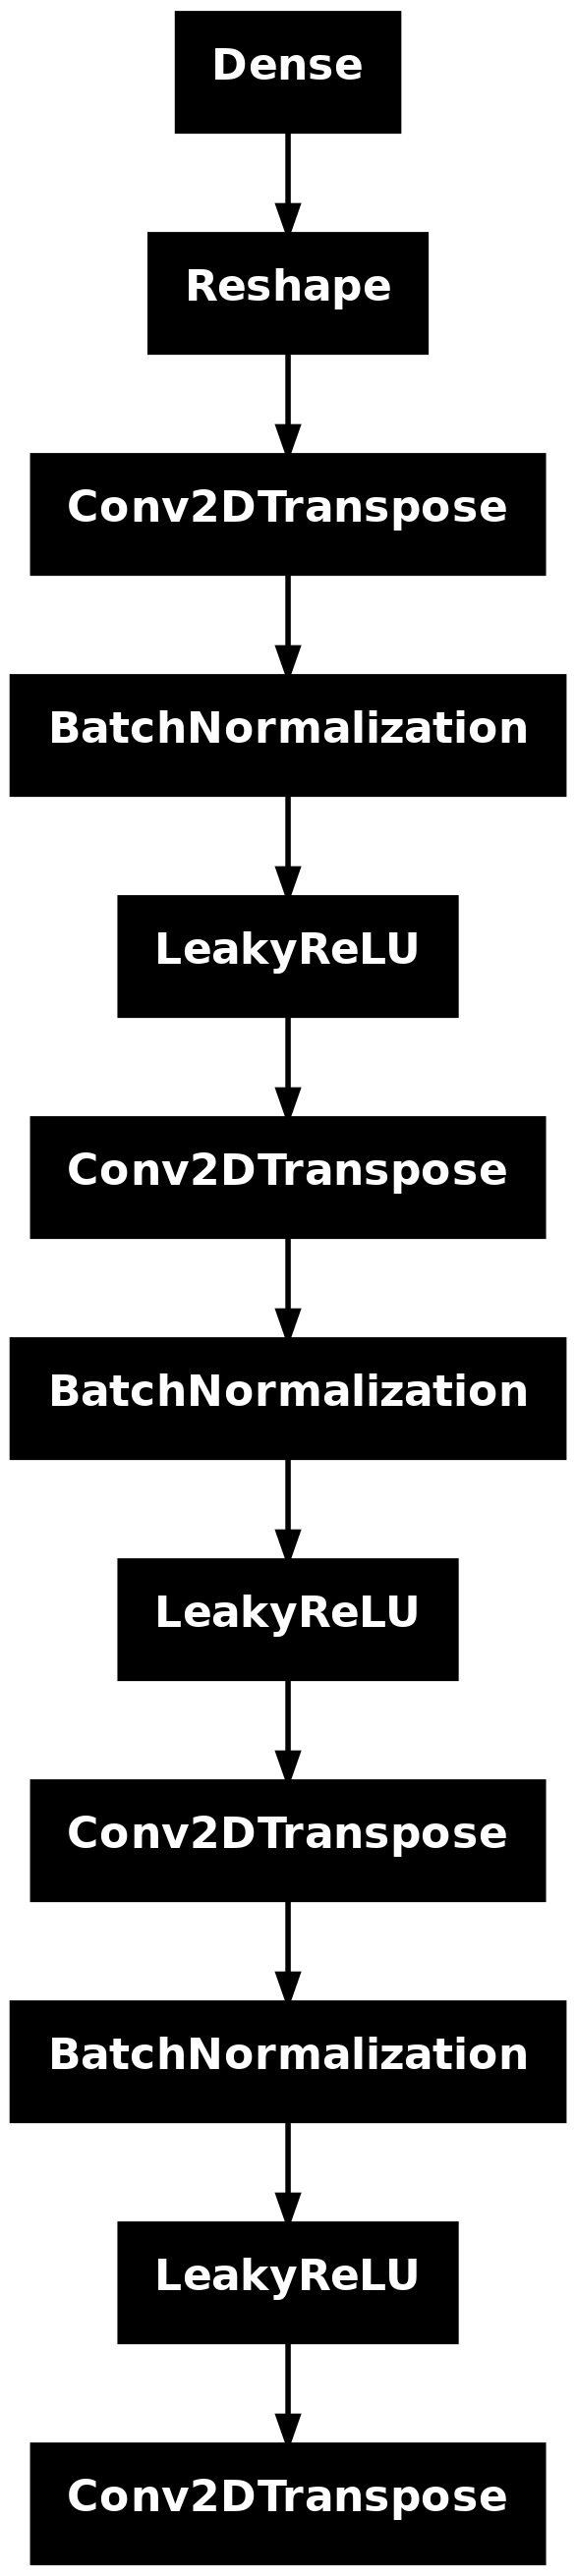

In [10]:
plot_model(generator)

In [11]:
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, padding="same", input_shape=(64,64,3)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))

discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same"))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))

discriminator.add(Conv2D(256, kernel_size=5, strides=2, padding="same"))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))

discriminator.add(Flatten())
discriminator.add(Dense(1, activation="sigmoid"))
  

/home/rtx/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


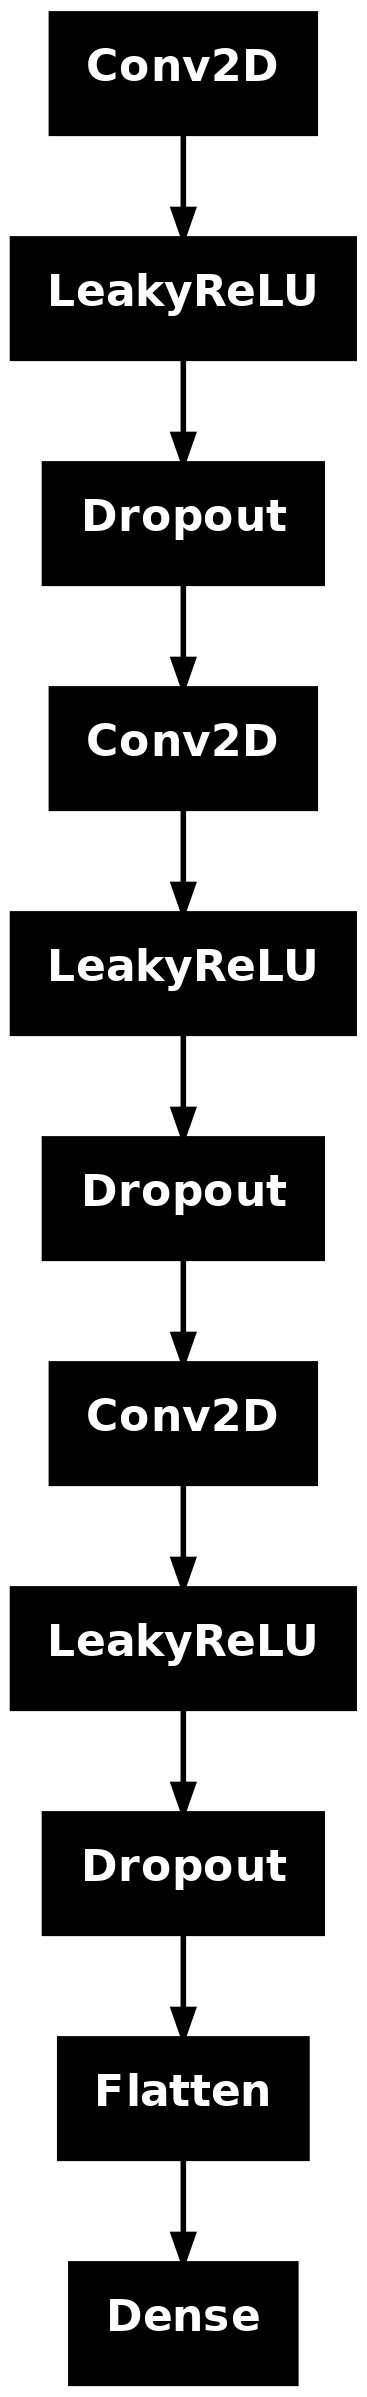

In [12]:
plot_model(discriminator)

In [13]:
discriminator.compile(optimizer="adam",loss="binary_crossentropy")
discriminator.trainable = False
GAN = tf.keras.Sequential([generator,discriminator])
GAN.compile(optimizer="adam",loss="binary_crossentropy")


Epoch 1/170


  0%|          | 0/154 [00:00<?, ?it/s]WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
I0000 00:00:1750412768.501099   32260 service.cc:152] XLA service 0x793e24002dd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750412768.501118   32260 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2025-06-20 15:16:08.509153: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1750412768.536468   32260 cuda_dnn.cc:529] Loaded cuDNN version 90501
2025-06-20 15:16:08.831942: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 764.00MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were a

d_loss_real: 0.1673, d_loss_fake: 0.1668, g_loss: 23.2274

Epoch 2/170


100%|██████████| 154/154 [00:06<00:00, 23.06it/s]


d_loss_real: 0.2856, d_loss_fake: 0.2851, g_loss: 60.8972

Epoch 3/170


100%|██████████| 154/154 [00:06<00:00, 22.85it/s]


d_loss_real: 0.2176, d_loss_fake: 0.2174, g_loss: 56.9466

Epoch 4/170


100%|██████████| 154/154 [00:06<00:00, 23.80it/s]


d_loss_real: 0.1739, d_loss_fake: 0.1738, g_loss: 45.6751

Epoch 5/170


100%|██████████| 154/154 [00:06<00:00, 23.87it/s]


d_loss_real: 5.4715, d_loss_fake: 5.4679, g_loss: 300.3747

Epoch 6/170


100%|██████████| 154/154 [00:06<00:00, 23.83it/s]


d_loss_real: 4.6654, d_loss_fake: 4.6629, g_loss: 314.8638

Epoch 7/170


100%|██████████| 154/154 [00:06<00:00, 23.64it/s]


d_loss_real: 4.5559, d_loss_fake: 4.5538, g_loss: 397.9534

Epoch 8/170


100%|██████████| 154/154 [00:06<00:00, 23.41it/s]


d_loss_real: 4.0353, d_loss_fake: 4.0337, g_loss: 352.5801

Epoch 9/170


100%|██████████| 154/154 [00:06<00:00, 22.18it/s]


d_loss_real: 3.6811, d_loss_fake: 3.6797, g_loss: 321.4527

Epoch 10/170


100%|██████████| 154/154 [00:06<00:00, 22.14it/s]


d_loss_real: 3.7549, d_loss_fake: 3.7537, g_loss: 308.2294


2025-06-20 15:17:24.180176: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 591.88MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


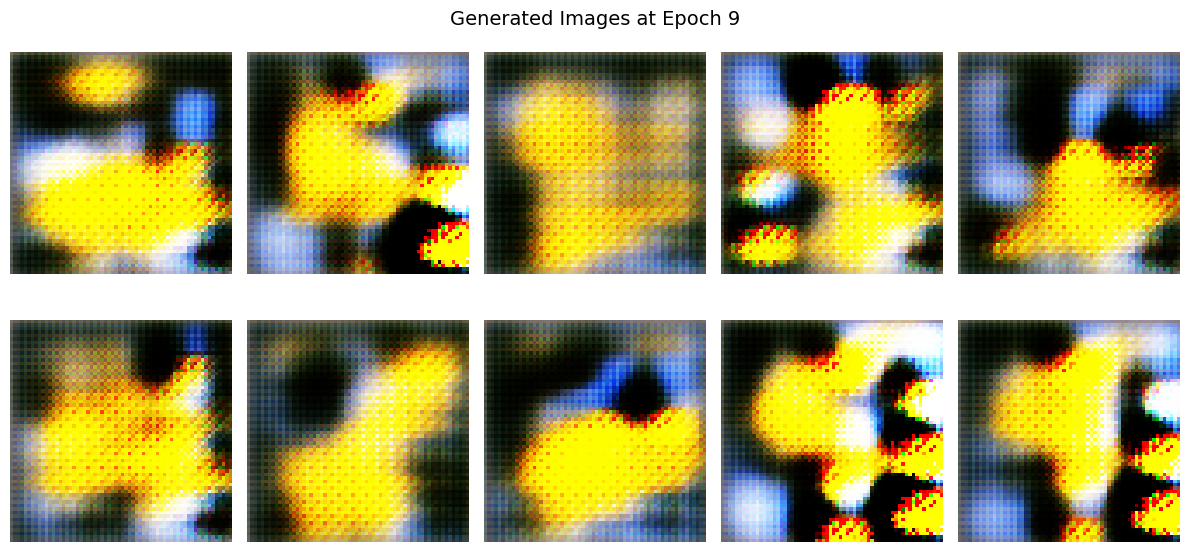


Epoch 11/170


100%|██████████| 154/154 [00:07<00:00, 21.85it/s]


d_loss_real: 3.4456, d_loss_fake: 3.4446, g_loss: 287.7893

Epoch 12/170


100%|██████████| 154/154 [00:06<00:00, 22.67it/s]


d_loss_real: 3.1739, d_loss_fake: 3.1731, g_loss: 265.6541

Epoch 13/170


100%|██████████| 154/154 [00:06<00:00, 22.28it/s]


d_loss_real: 2.9397, d_loss_fake: 2.9389, g_loss: 246.6526

Epoch 14/170


100%|██████████| 154/154 [00:06<00:00, 22.07it/s]


d_loss_real: 2.7387, d_loss_fake: 2.7382, g_loss: 230.8991

Epoch 15/170


100%|██████████| 154/154 [00:06<00:00, 22.19it/s]


d_loss_real: 2.5704, d_loss_fake: 2.5698, g_loss: 219.1475

Epoch 16/170


100%|██████████| 154/154 [00:07<00:00, 21.73it/s]


d_loss_real: 2.4200, d_loss_fake: 2.4195, g_loss: 209.0100

Epoch 17/170


100%|██████████| 154/154 [00:07<00:00, 21.60it/s]


d_loss_real: 2.2974, d_loss_fake: 2.2970, g_loss: 201.0613

Epoch 18/170


100%|██████████| 154/154 [00:06<00:00, 22.07it/s]


d_loss_real: 2.1764, d_loss_fake: 2.1761, g_loss: 191.3051

Epoch 19/170


100%|██████████| 154/154 [00:06<00:00, 22.10it/s]


d_loss_real: 2.0659, d_loss_fake: 2.0656, g_loss: 182.1888

Epoch 20/170


100%|██████████| 154/154 [00:07<00:00, 21.94it/s]


d_loss_real: 1.9638, d_loss_fake: 1.9635, g_loss: 173.2738
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


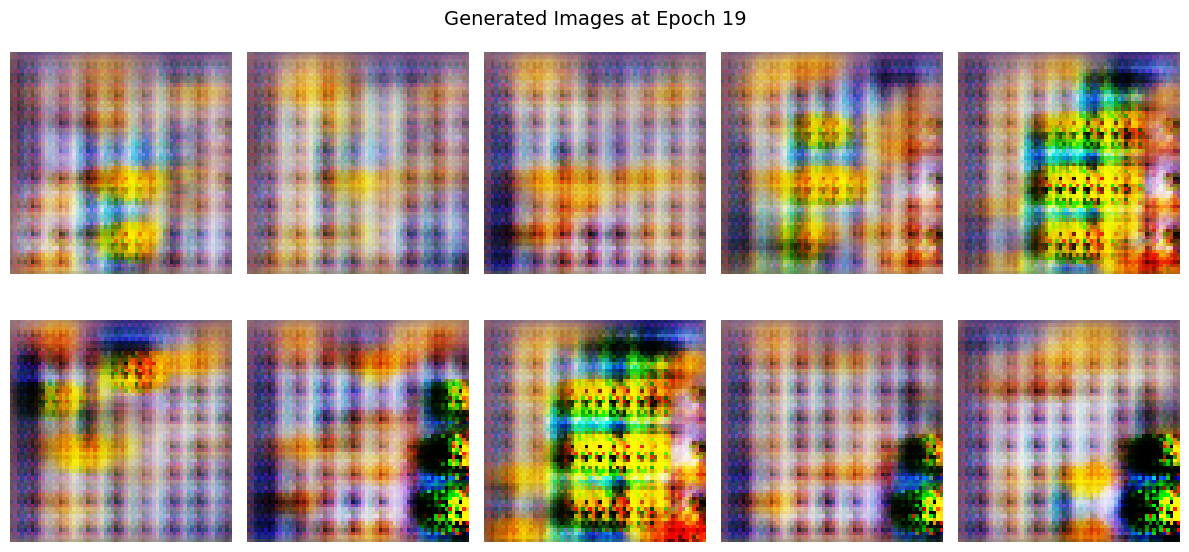


Epoch 21/170


100%|██████████| 154/154 [00:06<00:00, 22.39it/s]


d_loss_real: 1.9248, d_loss_fake: 1.9247, g_loss: 169.0303

Epoch 22/170


100%|██████████| 154/154 [00:06<00:00, 22.73it/s]


d_loss_real: 1.9619, d_loss_fake: 1.9616, g_loss: 166.2065

Epoch 23/170


100%|██████████| 154/154 [00:06<00:00, 22.40it/s]


d_loss_real: 1.9824, d_loss_fake: 1.9821, g_loss: 170.8793

Epoch 24/170


100%|██████████| 154/154 [00:06<00:00, 22.25it/s]


d_loss_real: 1.9329, d_loss_fake: 1.9326, g_loss: 171.8350

Epoch 25/170


100%|██████████| 154/154 [00:06<00:00, 22.85it/s]


d_loss_real: 1.8839, d_loss_fake: 1.8836, g_loss: 173.5139

Epoch 26/170


100%|██████████| 154/154 [00:06<00:00, 23.07it/s]


d_loss_real: 1.8253, d_loss_fake: 1.8250, g_loss: 172.5588

Epoch 27/170


100%|██████████| 154/154 [00:06<00:00, 23.33it/s]


d_loss_real: 1.7601, d_loss_fake: 1.7599, g_loss: 168.3813

Epoch 28/170


100%|██████████| 154/154 [00:06<00:00, 22.65it/s]


d_loss_real: 1.6997, d_loss_fake: 1.6996, g_loss: 165.6696

Epoch 29/170


100%|██████████| 154/154 [00:06<00:00, 23.09it/s]


d_loss_real: 1.6430, d_loss_fake: 1.6428, g_loss: 160.0999

Epoch 30/170


100%|██████████| 154/154 [00:06<00:00, 23.28it/s]


d_loss_real: 1.5906, d_loss_fake: 1.5905, g_loss: 155.4029
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


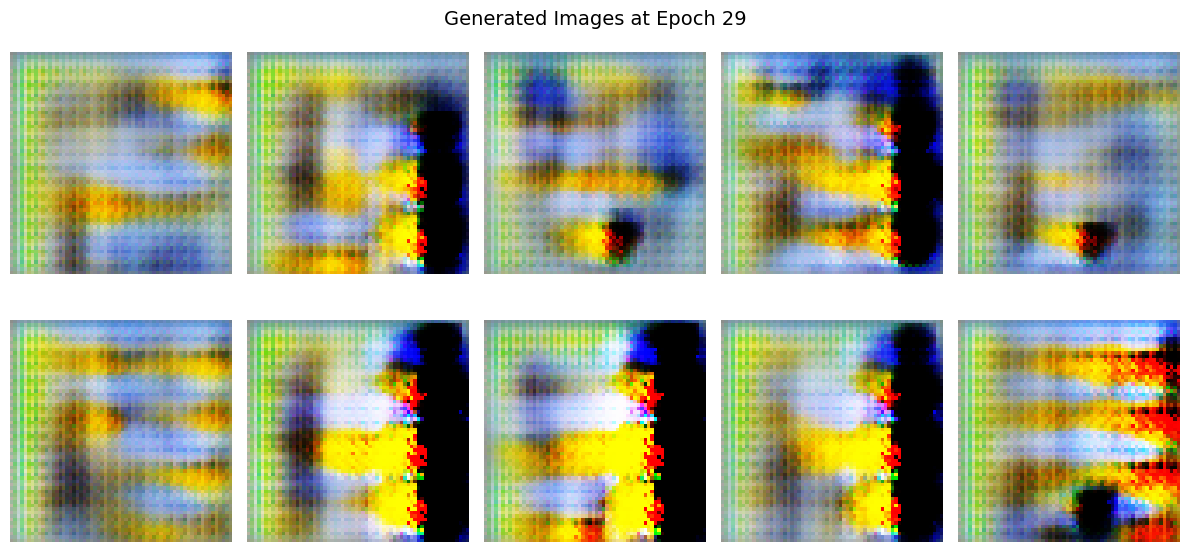


Epoch 31/170


100%|██████████| 154/154 [00:06<00:00, 23.30it/s]


d_loss_real: 1.5408, d_loss_fake: 1.5407, g_loss: 150.7358

Epoch 32/170


100%|██████████| 154/154 [00:05<00:00, 30.19it/s]


d_loss_real: 1.4994, d_loss_fake: 1.4993, g_loss: 147.0198

Epoch 33/170


100%|██████████| 154/154 [00:03<00:00, 38.72it/s]


d_loss_real: 1.4591, d_loss_fake: 1.4590, g_loss: 145.0847

Epoch 34/170


100%|██████████| 154/154 [00:03<00:00, 38.81it/s]


d_loss_real: 1.4220, d_loss_fake: 1.4219, g_loss: 142.9793

Epoch 35/170


100%|██████████| 154/154 [00:03<00:00, 38.94it/s]


d_loss_real: 1.3890, d_loss_fake: 1.3889, g_loss: 142.4993

Epoch 36/170


100%|██████████| 154/154 [00:03<00:00, 38.92it/s]


d_loss_real: 1.3546, d_loss_fake: 1.3545, g_loss: 139.7492

Epoch 37/170


100%|██████████| 154/154 [00:03<00:00, 39.01it/s]


d_loss_real: 1.3655, d_loss_fake: 1.3654, g_loss: 141.9247

Epoch 38/170


100%|██████████| 154/154 [00:03<00:00, 39.06it/s]


d_loss_real: 1.9251, d_loss_fake: 1.9270, g_loss: 192.7854

Epoch 39/170


100%|██████████| 154/154 [00:03<00:00, 38.99it/s]


d_loss_real: 2.3393, d_loss_fake: 2.3391, g_loss: 367.4580

Epoch 40/170


100%|██████████| 154/154 [00:03<00:00, 39.05it/s]

d_loss_real: 2.3189, d_loss_fake: 2.3187, g_loss: 412.5605
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


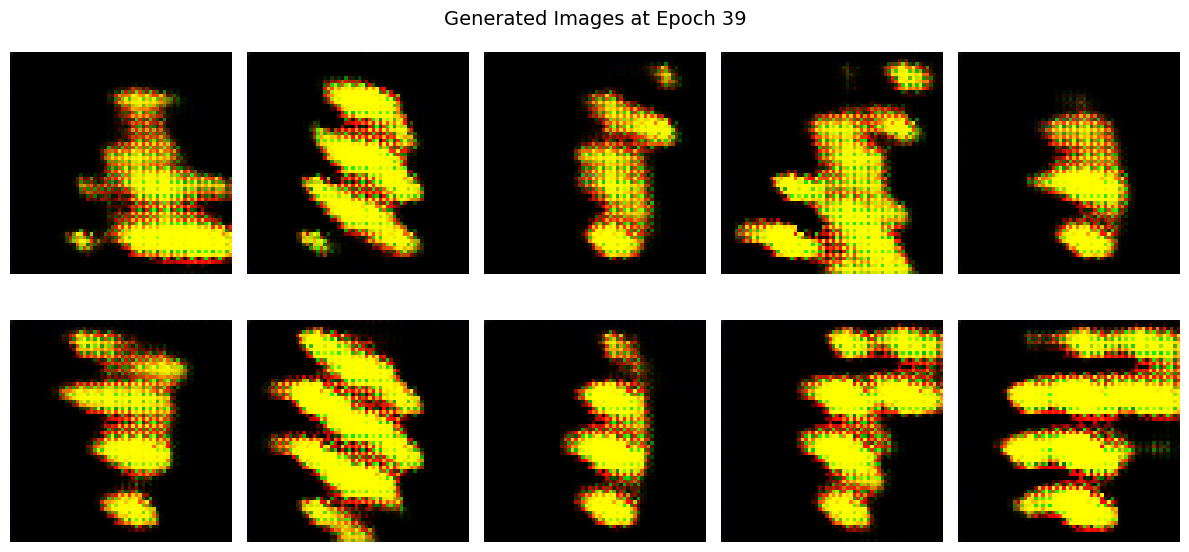


Epoch 41/170


100%|██████████| 154/154 [00:03<00:00, 38.77it/s]


d_loss_real: 2.2658, d_loss_fake: 2.2656, g_loss: 434.8288

Epoch 42/170


100%|██████████| 154/154 [00:03<00:00, 38.87it/s]


d_loss_real: 2.2189, d_loss_fake: 2.2188, g_loss: 437.3217

Epoch 43/170


100%|██████████| 154/154 [00:03<00:00, 38.97it/s]


d_loss_real: 2.5068, d_loss_fake: 2.5066, g_loss: 457.0338

Epoch 44/170


100%|██████████| 154/154 [00:03<00:00, 38.78it/s]


d_loss_real: 2.4937, d_loss_fake: 2.4935, g_loss: 459.7629

Epoch 45/170


100%|██████████| 154/154 [00:03<00:00, 38.99it/s]


d_loss_real: 2.4658, d_loss_fake: 2.4656, g_loss: 453.9666

Epoch 46/170


100%|██████████| 154/154 [00:03<00:00, 38.98it/s]


d_loss_real: 2.4227, d_loss_fake: 2.4226, g_loss: 449.7003

Epoch 47/170


100%|██████████| 154/154 [00:03<00:00, 38.87it/s]


d_loss_real: 2.3873, d_loss_fake: 2.3872, g_loss: 448.4319

Epoch 48/170


100%|██████████| 154/154 [00:03<00:00, 38.90it/s]


d_loss_real: 2.3559, d_loss_fake: 2.3559, g_loss: 444.5915

Epoch 49/170


100%|██████████| 154/154 [00:03<00:00, 38.83it/s]


d_loss_real: 2.3183, d_loss_fake: 2.3181, g_loss: 438.1072

Epoch 50/170


100%|██████████| 154/154 [00:03<00:00, 38.94it/s]

d_loss_real: 2.2890, d_loss_fake: 2.2888, g_loss: 435.2321
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


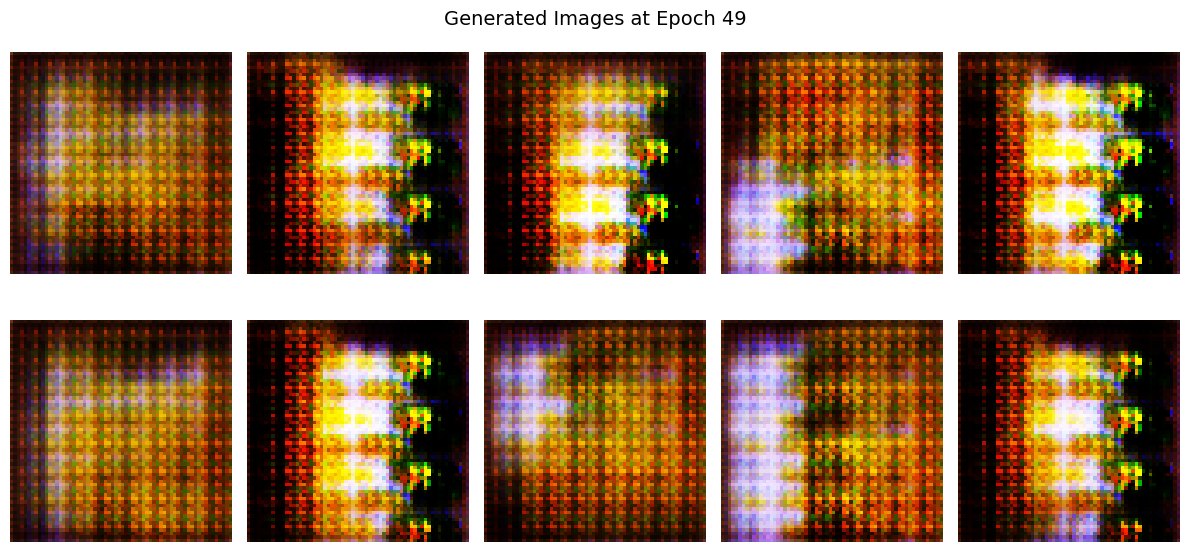


Epoch 51/170


100%|██████████| 154/154 [00:03<00:00, 38.95it/s]


d_loss_real: 2.2574, d_loss_fake: 2.2573, g_loss: 428.2386

Epoch 52/170


100%|██████████| 154/154 [00:03<00:00, 38.96it/s]


d_loss_real: 2.2235, d_loss_fake: 2.2233, g_loss: 424.5800

Epoch 53/170


100%|██████████| 154/154 [00:03<00:00, 38.91it/s]


d_loss_real: 2.1936, d_loss_fake: 2.1935, g_loss: 418.2316

Epoch 54/170


100%|██████████| 154/154 [00:03<00:00, 39.19it/s]


d_loss_real: 2.1683, d_loss_fake: 2.1682, g_loss: 415.0556

Epoch 55/170


100%|██████████| 154/154 [00:03<00:00, 38.88it/s]


d_loss_real: 2.1457, d_loss_fake: 2.1456, g_loss: 414.9652

Epoch 56/170


100%|██████████| 154/154 [00:03<00:00, 38.51it/s]


d_loss_real: 2.1209, d_loss_fake: 2.1207, g_loss: 410.4634

Epoch 57/170


100%|██████████| 154/154 [00:03<00:00, 38.64it/s]


d_loss_real: 2.0994, d_loss_fake: 2.0993, g_loss: 408.5841

Epoch 58/170


100%|██████████| 154/154 [00:03<00:00, 38.91it/s]


d_loss_real: 2.0683, d_loss_fake: 2.0682, g_loss: 404.4384

Epoch 59/170


100%|██████████| 154/154 [00:04<00:00, 38.41it/s]


d_loss_real: 2.0389, d_loss_fake: 2.0388, g_loss: 400.2708

Epoch 60/170


100%|██████████| 154/154 [00:03<00:00, 38.80it/s]

d_loss_real: 2.0123, d_loss_fake: 2.0122, g_loss: 396.5843
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


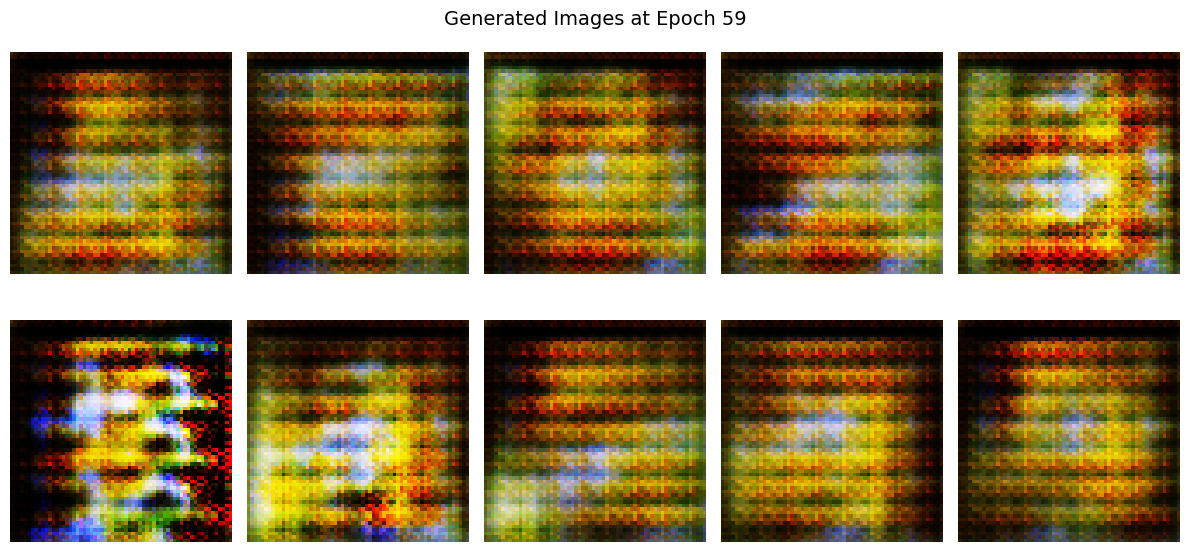


Epoch 61/170


100%|██████████| 154/154 [00:04<00:00, 38.40it/s]


d_loss_real: 2.0017, d_loss_fake: 2.0016, g_loss: 396.3662

Epoch 62/170


100%|██████████| 154/154 [00:04<00:00, 38.43it/s]


d_loss_real: 1.9840, d_loss_fake: 1.9839, g_loss: 397.0349

Epoch 63/170


100%|██████████| 154/154 [00:03<00:00, 38.75it/s]


d_loss_real: 1.9585, d_loss_fake: 1.9584, g_loss: 393.3324

Epoch 64/170


100%|██████████| 154/154 [00:04<00:00, 37.99it/s]


d_loss_real: 1.9401, d_loss_fake: 1.9400, g_loss: 391.1713

Epoch 65/170


100%|██████████| 154/154 [00:03<00:00, 38.57it/s]


d_loss_real: 1.9196, d_loss_fake: 1.9195, g_loss: 387.2189

Epoch 66/170


100%|██████████| 154/154 [00:03<00:00, 38.60it/s]


d_loss_real: 1.8977, d_loss_fake: 1.8976, g_loss: 386.5094

Epoch 67/170


100%|██████████| 154/154 [00:04<00:00, 38.41it/s]


d_loss_real: 1.8760, d_loss_fake: 1.8759, g_loss: 383.6013

Epoch 68/170


100%|██████████| 154/154 [00:03<00:00, 38.70it/s]


d_loss_real: 1.8577, d_loss_fake: 1.8576, g_loss: 381.4749

Epoch 69/170


100%|██████████| 154/154 [00:03<00:00, 38.80it/s]


d_loss_real: 1.8350, d_loss_fake: 1.8349, g_loss: 379.2884

Epoch 70/170


100%|██████████| 154/154 [00:03<00:00, 38.61it/s]

d_loss_real: 1.8954, d_loss_fake: 1.8953, g_loss: 380.0426
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


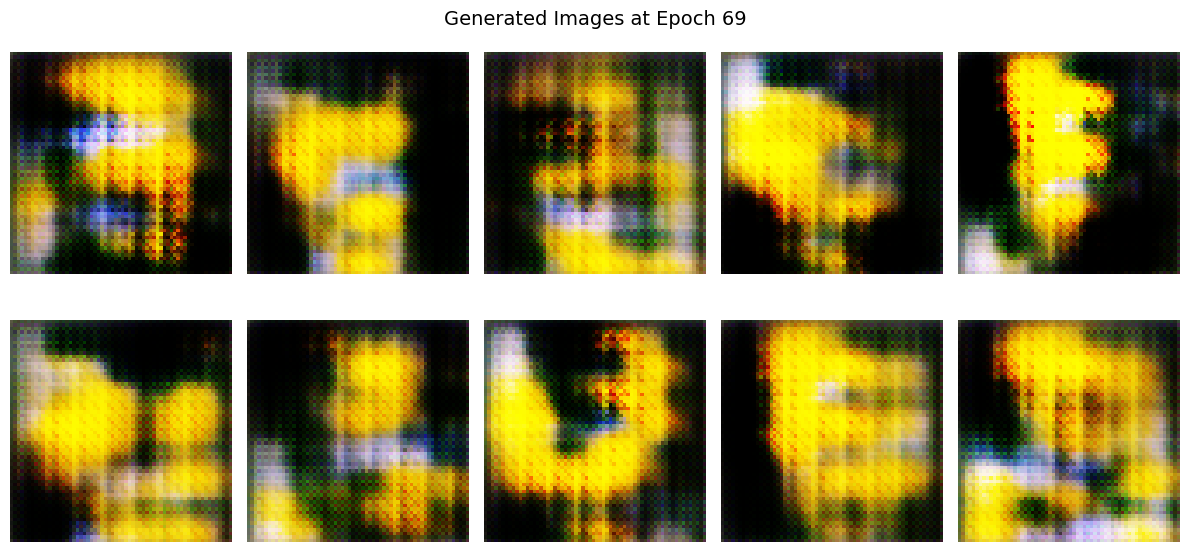


Epoch 71/170


100%|██████████| 154/154 [00:03<00:00, 39.13it/s]


d_loss_real: 1.9463, d_loss_fake: 1.9462, g_loss: 384.7129

Epoch 72/170


100%|██████████| 154/154 [00:03<00:00, 39.39it/s]


d_loss_real: 1.9398, d_loss_fake: 1.9397, g_loss: 390.7269

Epoch 73/170


100%|██████████| 154/154 [00:03<00:00, 39.35it/s]


d_loss_real: 1.9259, d_loss_fake: 1.9258, g_loss: 388.9964

Epoch 74/170


100%|██████████| 154/154 [00:03<00:00, 38.86it/s]


d_loss_real: 1.9114, d_loss_fake: 1.9113, g_loss: 386.9679

Epoch 75/170


100%|██████████| 154/154 [00:03<00:00, 39.54it/s]


d_loss_real: 1.9009, d_loss_fake: 1.9008, g_loss: 385.2356

Epoch 76/170


100%|██████████| 154/154 [00:03<00:00, 39.44it/s]


d_loss_real: 1.8874, d_loss_fake: 1.8873, g_loss: 383.1551

Epoch 77/170


100%|██████████| 154/154 [00:03<00:00, 39.29it/s]


d_loss_real: 1.8699, d_loss_fake: 1.8698, g_loss: 381.3568

Epoch 78/170


100%|██████████| 154/154 [00:03<00:00, 39.29it/s]


d_loss_real: 1.8526, d_loss_fake: 1.8525, g_loss: 378.9052

Epoch 79/170


100%|██████████| 154/154 [00:03<00:00, 39.64it/s]


d_loss_real: 1.8351, d_loss_fake: 1.8350, g_loss: 376.4419

Epoch 80/170


100%|██████████| 154/154 [00:03<00:00, 39.00it/s]


d_loss_real: 1.8233, d_loss_fake: 1.8234, g_loss: 377.4347
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


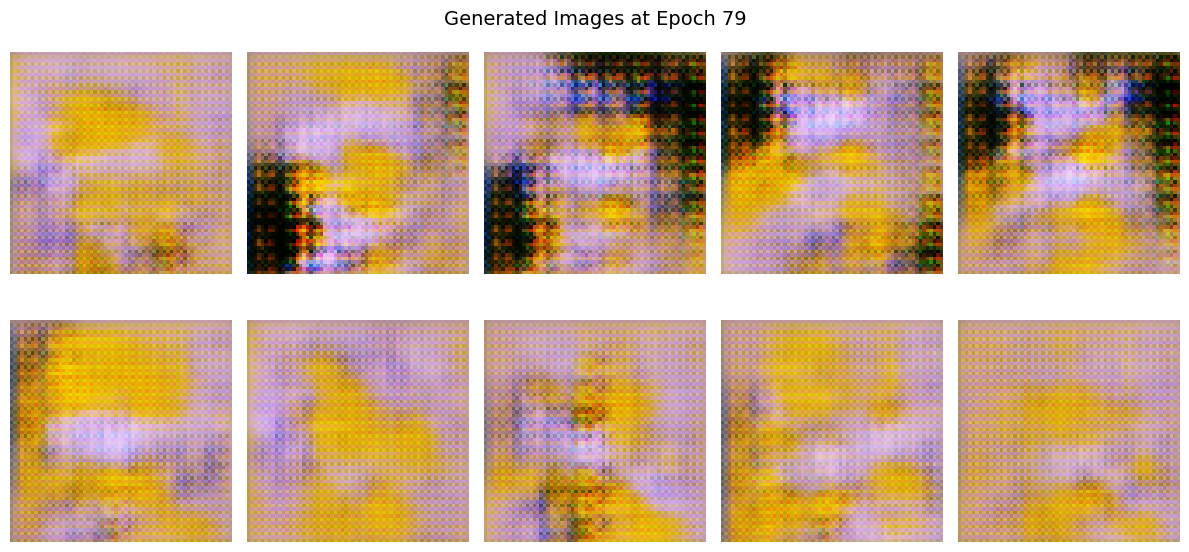


Epoch 81/170


100%|██████████| 154/154 [00:04<00:00, 37.43it/s]


d_loss_real: 1.8165, d_loss_fake: 1.8164, g_loss: 376.2112

Epoch 82/170


100%|██████████| 154/154 [00:04<00:00, 37.39it/s]


d_loss_real: 1.8007, d_loss_fake: 1.8006, g_loss: 375.3435

Epoch 83/170


100%|██████████| 154/154 [00:04<00:00, 37.45it/s]


d_loss_real: 1.7826, d_loss_fake: 1.7826, g_loss: 373.5709

Epoch 84/170


100%|██████████| 154/154 [00:04<00:00, 37.32it/s]


d_loss_real: 1.7650, d_loss_fake: 1.7649, g_loss: 371.5396

Epoch 85/170


100%|██████████| 154/154 [00:04<00:00, 38.05it/s]


d_loss_real: 1.7467, d_loss_fake: 1.7466, g_loss: 369.2992

Epoch 86/170


100%|██████████| 154/154 [00:04<00:00, 38.16it/s]


d_loss_real: 1.7305, d_loss_fake: 1.7305, g_loss: 367.0741

Epoch 87/170


100%|██████████| 154/154 [00:03<00:00, 38.70it/s]


d_loss_real: 1.7166, d_loss_fake: 1.7166, g_loss: 365.9237

Epoch 88/170


100%|██████████| 154/154 [00:04<00:00, 37.73it/s]


d_loss_real: 1.7165, d_loss_fake: 1.7164, g_loss: 365.6146

Epoch 89/170


100%|██████████| 154/154 [00:03<00:00, 38.84it/s]


d_loss_real: 1.7093, d_loss_fake: 1.7093, g_loss: 365.0408

Epoch 90/170


100%|██████████| 154/154 [00:04<00:00, 37.91it/s]


d_loss_real: 1.6956, d_loss_fake: 1.6956, g_loss: 363.3528
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


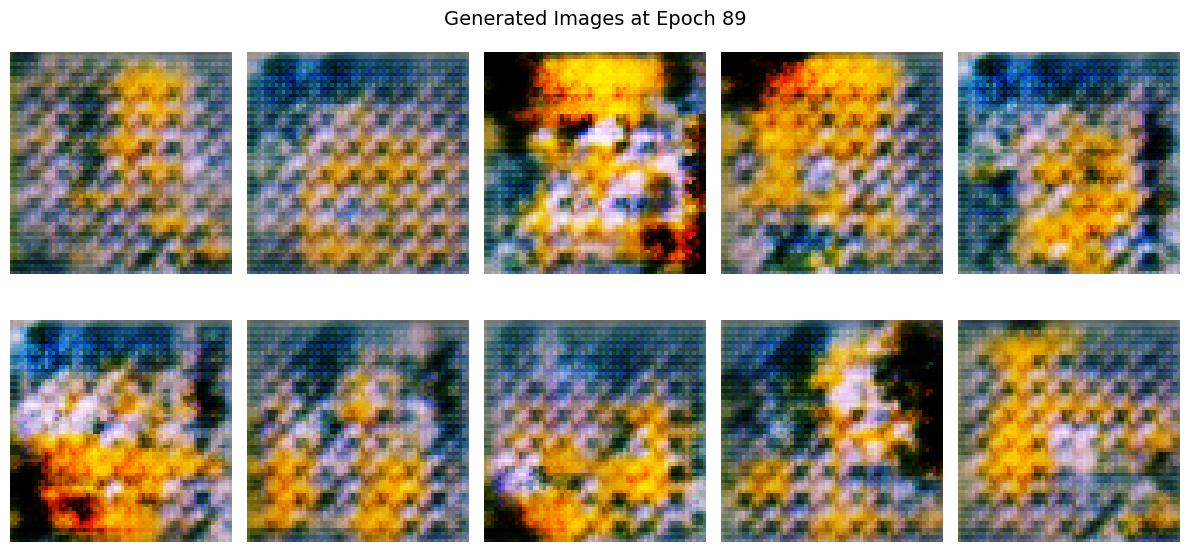


Epoch 91/170


100%|██████████| 154/154 [00:04<00:00, 36.92it/s]


d_loss_real: 1.6819, d_loss_fake: 1.6818, g_loss: 362.9656

Epoch 92/170


100%|██████████| 154/154 [00:04<00:00, 37.10it/s]


d_loss_real: 1.6692, d_loss_fake: 1.6692, g_loss: 362.0404

Epoch 93/170


100%|██████████| 154/154 [00:04<00:00, 37.35it/s]


d_loss_real: 1.6582, d_loss_fake: 1.6581, g_loss: 361.0110

Epoch 94/170


100%|██████████| 154/154 [00:04<00:00, 37.50it/s]


d_loss_real: 1.6447, d_loss_fake: 1.6446, g_loss: 359.9672

Epoch 95/170


100%|██████████| 154/154 [00:04<00:00, 37.71it/s]


d_loss_real: 1.6308, d_loss_fake: 1.6307, g_loss: 358.8658

Epoch 96/170


100%|██████████| 154/154 [00:04<00:00, 37.69it/s]


d_loss_real: 1.6400, d_loss_fake: 1.6400, g_loss: 359.9753

Epoch 97/170


100%|██████████| 154/154 [00:04<00:00, 37.72it/s]


d_loss_real: 1.6377, d_loss_fake: 1.6377, g_loss: 362.0876

Epoch 98/170


100%|██████████| 154/154 [00:04<00:00, 37.24it/s]


d_loss_real: 1.6323, d_loss_fake: 1.6322, g_loss: 362.6515

Epoch 99/170


100%|██████████| 154/154 [00:04<00:00, 37.29it/s]


d_loss_real: 1.6244, d_loss_fake: 1.6243, g_loss: 361.9828

Epoch 100/170


100%|██████████| 154/154 [00:04<00:00, 37.34it/s]

d_loss_real: 1.6157, d_loss_fake: 1.6157, g_loss: 361.4485
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


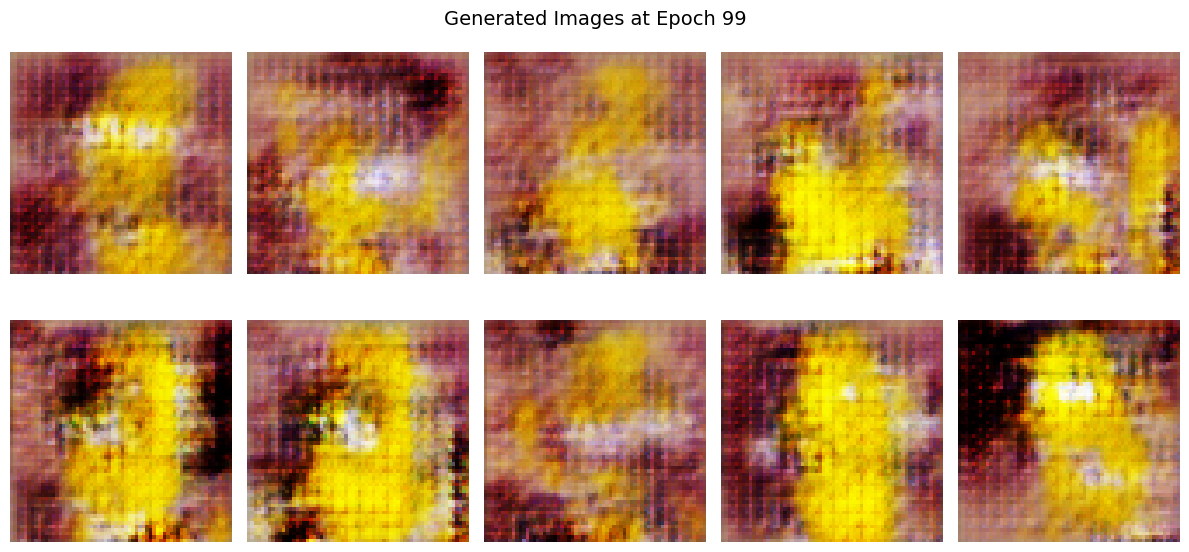


Epoch 101/170


100%|██████████| 154/154 [00:04<00:00, 37.74it/s]


d_loss_real: 1.6042, d_loss_fake: 1.6041, g_loss: 360.0911

Epoch 102/170


100%|██████████| 154/154 [00:04<00:00, 37.77it/s]


d_loss_real: 1.5917, d_loss_fake: 1.5918, g_loss: 358.7476

Epoch 103/170


100%|██████████| 154/154 [00:04<00:00, 37.49it/s]


d_loss_real: 1.5811, d_loss_fake: 1.5811, g_loss: 357.6653

Epoch 104/170


100%|██████████| 154/154 [00:04<00:00, 37.75it/s]


d_loss_real: 1.5704, d_loss_fake: 1.5704, g_loss: 356.5314

Epoch 105/170


100%|██████████| 154/154 [00:04<00:00, 37.60it/s]


d_loss_real: 1.5605, d_loss_fake: 1.5604, g_loss: 355.5641

Epoch 106/170


100%|██████████| 154/154 [00:04<00:00, 37.23it/s]


d_loss_real: 1.5501, d_loss_fake: 1.5502, g_loss: 354.6254

Epoch 107/170


100%|██████████| 154/154 [00:04<00:00, 37.52it/s]


d_loss_real: 1.5395, d_loss_fake: 1.5396, g_loss: 353.6171

Epoch 108/170


100%|██████████| 154/154 [00:04<00:00, 37.65it/s]


d_loss_real: 1.5295, d_loss_fake: 1.5295, g_loss: 352.4264

Epoch 109/170


100%|██████████| 154/154 [00:04<00:00, 37.27it/s]


d_loss_real: 1.5226, d_loss_fake: 1.5225, g_loss: 351.6902

Epoch 110/170


100%|██████████| 154/154 [00:04<00:00, 37.29it/s]

d_loss_real: 1.5136, d_loss_fake: 1.5136, g_loss: 351.0605
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


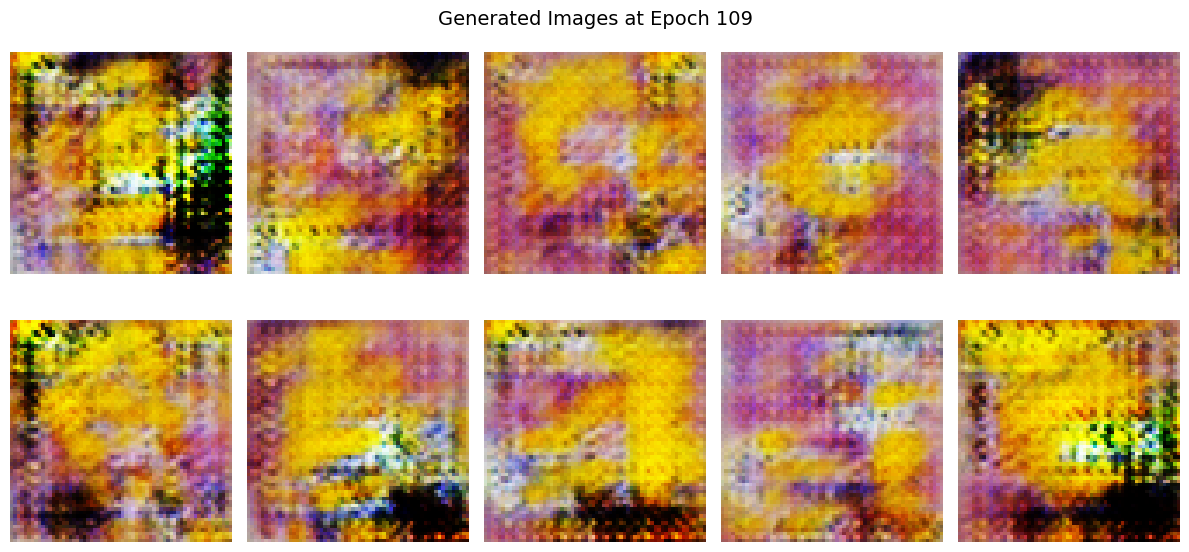


Epoch 111/170


100%|██████████| 154/154 [00:04<00:00, 37.53it/s]


d_loss_real: 1.5072, d_loss_fake: 1.5071, g_loss: 350.5391

Epoch 112/170


100%|██████████| 154/154 [00:04<00:00, 37.42it/s]


d_loss_real: 1.5019, d_loss_fake: 1.5020, g_loss: 350.0468

Epoch 113/170


100%|██████████| 154/154 [00:04<00:00, 37.42it/s]


d_loss_real: 1.4948, d_loss_fake: 1.4947, g_loss: 349.4724

Epoch 114/170


100%|██████████| 154/154 [00:04<00:00, 37.75it/s]


d_loss_real: 1.4882, d_loss_fake: 1.4882, g_loss: 349.3379

Epoch 115/170


100%|██████████| 154/154 [00:04<00:00, 37.47it/s]


d_loss_real: 1.4811, d_loss_fake: 1.4811, g_loss: 348.9708

Epoch 116/170


100%|██████████| 154/154 [00:04<00:00, 37.37it/s]


d_loss_real: 1.4719, d_loss_fake: 1.4718, g_loss: 348.3934

Epoch 117/170


100%|██████████| 154/154 [00:04<00:00, 37.58it/s]


d_loss_real: 1.4640, d_loss_fake: 1.4640, g_loss: 347.9350

Epoch 118/170


100%|██████████| 154/154 [00:04<00:00, 37.48it/s]


d_loss_real: 1.4570, d_loss_fake: 1.4570, g_loss: 347.6513

Epoch 119/170


100%|██████████| 154/154 [00:04<00:00, 37.70it/s]


d_loss_real: 1.4504, d_loss_fake: 1.4504, g_loss: 347.2866

Epoch 120/170


100%|██████████| 154/154 [00:04<00:00, 37.72it/s]

d_loss_real: 1.4421, d_loss_fake: 1.4421, g_loss: 346.6603
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


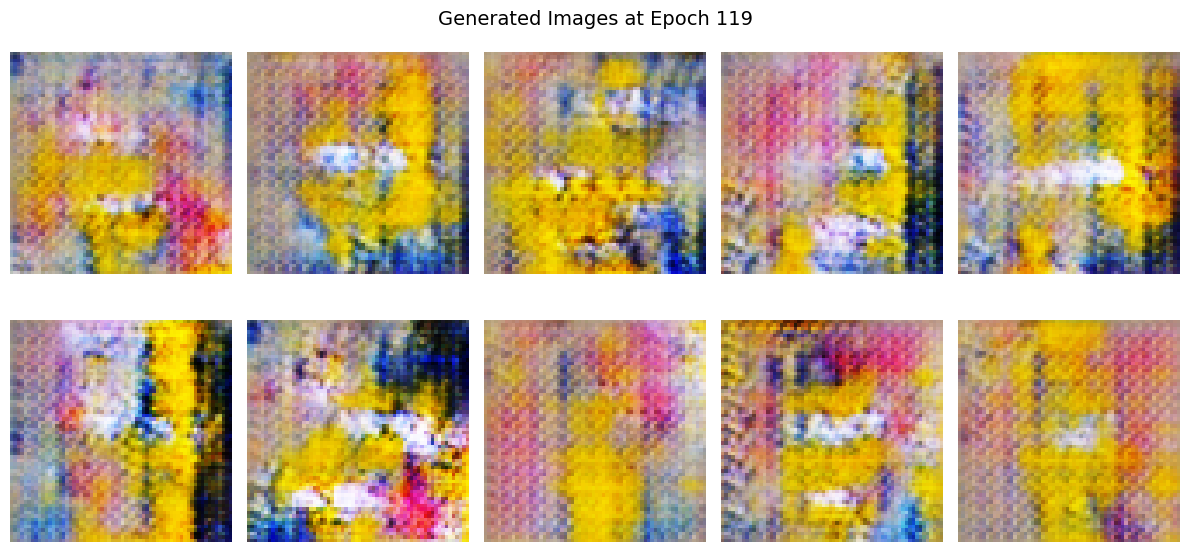


Epoch 121/170


100%|██████████| 154/154 [00:04<00:00, 37.65it/s]


d_loss_real: 1.4344, d_loss_fake: 1.4343, g_loss: 346.8638

Epoch 122/170


100%|██████████| 154/154 [00:04<00:00, 37.50it/s]


d_loss_real: 1.4260, d_loss_fake: 1.4260, g_loss: 346.6592

Epoch 123/170


100%|██████████| 154/154 [00:04<00:00, 37.49it/s]


d_loss_real: 1.4179, d_loss_fake: 1.4179, g_loss: 346.6433

Epoch 124/170


100%|██████████| 154/154 [00:04<00:00, 37.59it/s]


d_loss_real: 1.4102, d_loss_fake: 1.4102, g_loss: 346.5125

Epoch 125/170


100%|██████████| 154/154 [00:04<00:00, 37.56it/s]


d_loss_real: 1.4050, d_loss_fake: 1.4050, g_loss: 346.5875

Epoch 126/170


100%|██████████| 154/154 [00:04<00:00, 37.82it/s]


d_loss_real: 1.3974, d_loss_fake: 1.3974, g_loss: 346.5648

Epoch 127/170


100%|██████████| 154/154 [00:04<00:00, 37.71it/s]


d_loss_real: 1.3929, d_loss_fake: 1.3929, g_loss: 347.2118

Epoch 128/170


100%|██████████| 154/154 [00:04<00:00, 37.81it/s]


d_loss_real: 1.3853, d_loss_fake: 1.3853, g_loss: 347.6027

Epoch 129/170


100%|██████████| 154/154 [00:04<00:00, 37.84it/s]


d_loss_real: 1.3782, d_loss_fake: 1.3782, g_loss: 348.4561

Epoch 130/170


100%|██████████| 154/154 [00:04<00:00, 37.68it/s]

d_loss_real: 1.3716, d_loss_fake: 1.3716, g_loss: 349.5610
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


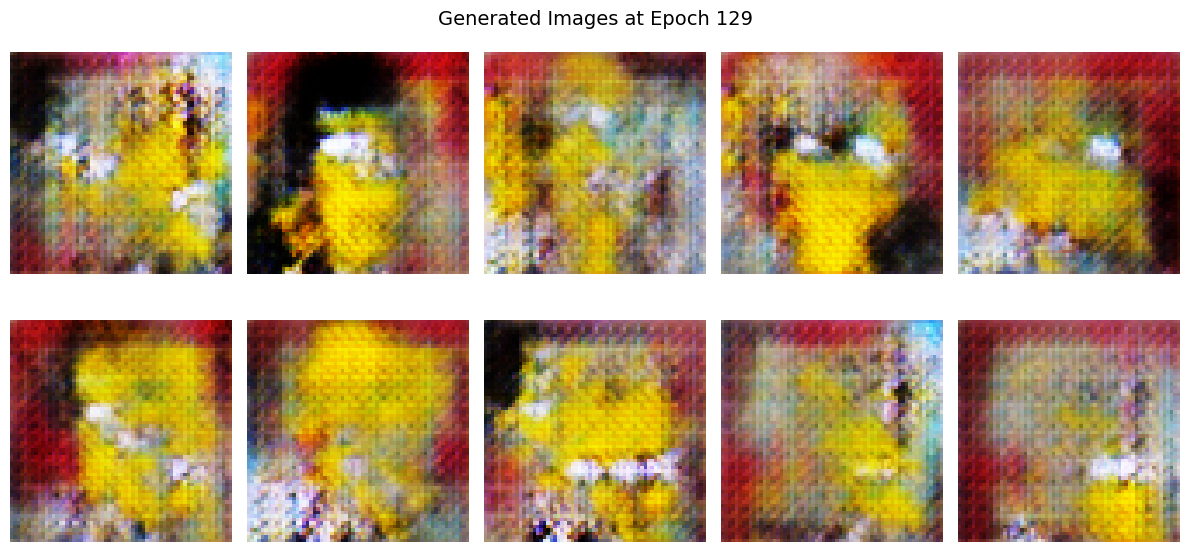


Epoch 131/170


100%|██████████| 154/154 [00:04<00:00, 37.72it/s]


d_loss_real: 1.3668, d_loss_fake: 1.3667, g_loss: 350.1180

Epoch 132/170


100%|██████████| 154/154 [00:03<00:00, 39.70it/s]


d_loss_real: 1.3713, d_loss_fake: 1.3712, g_loss: 351.5079

Epoch 133/170


100%|██████████| 154/154 [00:03<00:00, 39.92it/s]


d_loss_real: 1.3677, d_loss_fake: 1.3676, g_loss: 352.1111

Epoch 134/170


100%|██████████| 154/154 [00:03<00:00, 39.91it/s]


d_loss_real: 1.3621, d_loss_fake: 1.3621, g_loss: 352.9960

Epoch 135/170


100%|██████████| 154/154 [00:03<00:00, 39.22it/s]


d_loss_real: 1.3570, d_loss_fake: 1.3570, g_loss: 353.4269

Epoch 136/170


100%|██████████| 154/154 [00:03<00:00, 38.98it/s]


d_loss_real: 1.3513, d_loss_fake: 1.3513, g_loss: 354.3248

Epoch 137/170


100%|██████████| 154/154 [00:03<00:00, 38.93it/s]


d_loss_real: 1.3461, d_loss_fake: 1.3461, g_loss: 355.3200

Epoch 138/170


100%|██████████| 154/154 [00:03<00:00, 38.58it/s]


d_loss_real: 1.3408, d_loss_fake: 1.3408, g_loss: 356.6958

Epoch 139/170


100%|██████████| 154/154 [00:03<00:00, 38.83it/s]


d_loss_real: 1.3360, d_loss_fake: 1.3360, g_loss: 357.3936

Epoch 140/170


100%|██████████| 154/154 [00:03<00:00, 38.86it/s]

d_loss_real: 1.3341, d_loss_fake: 1.3341, g_loss: 359.4318
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


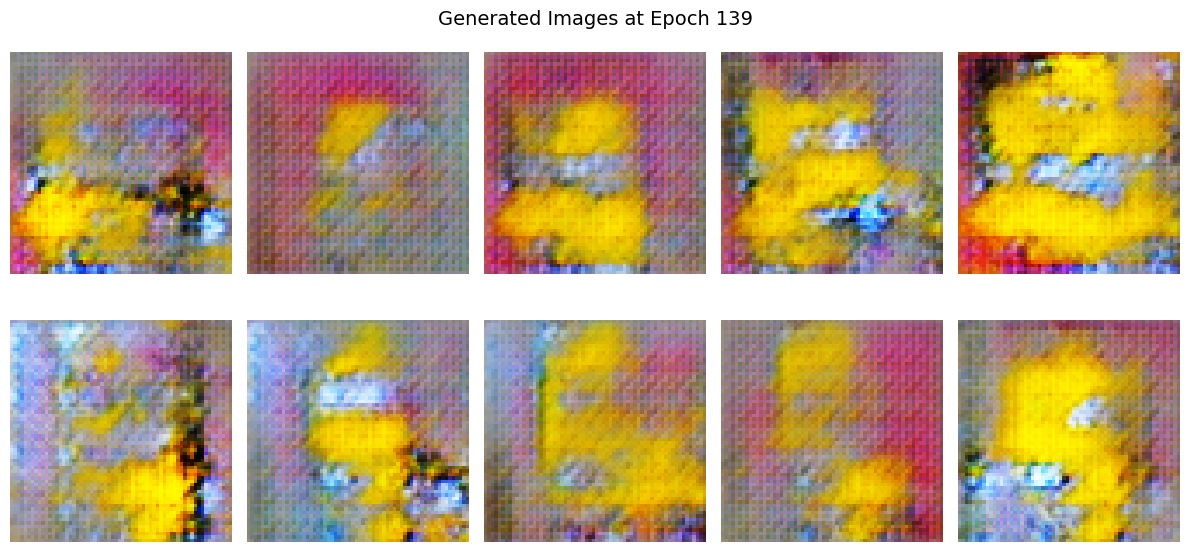


Epoch 141/170


100%|██████████| 154/154 [00:03<00:00, 38.85it/s]


d_loss_real: 1.3298, d_loss_fake: 1.3298, g_loss: 360.8788

Epoch 142/170


100%|██████████| 154/154 [00:03<00:00, 38.79it/s]


d_loss_real: 1.3238, d_loss_fake: 1.3238, g_loss: 362.1366

Epoch 143/170


100%|██████████| 154/154 [00:03<00:00, 38.77it/s]


d_loss_real: 1.3185, d_loss_fake: 1.3185, g_loss: 363.6941

Epoch 144/170


100%|██████████| 154/154 [00:03<00:00, 38.91it/s]


d_loss_real: 1.3140, d_loss_fake: 1.3140, g_loss: 365.9136

Epoch 145/170


100%|██████████| 154/154 [00:03<00:00, 38.77it/s]


d_loss_real: 1.3107, d_loss_fake: 1.3107, g_loss: 368.0396

Epoch 146/170


100%|██████████| 154/154 [00:03<00:00, 39.02it/s]


d_loss_real: 1.3071, d_loss_fake: 1.3070, g_loss: 369.9465

Epoch 147/170


100%|██████████| 154/154 [00:03<00:00, 39.25it/s]


d_loss_real: 1.3062, d_loss_fake: 1.3061, g_loss: 373.7197

Epoch 148/170


100%|██████████| 154/154 [00:03<00:00, 39.58it/s]


d_loss_real: 1.3005, d_loss_fake: 1.3004, g_loss: 374.0194

Epoch 149/170


100%|██████████| 154/154 [00:03<00:00, 39.36it/s]


d_loss_real: 1.2970, d_loss_fake: 1.2969, g_loss: 376.6187

Epoch 150/170


100%|██████████| 154/154 [00:03<00:00, 39.59it/s]

d_loss_real: 1.2917, d_loss_fake: 1.2918, g_loss: 378.2024
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


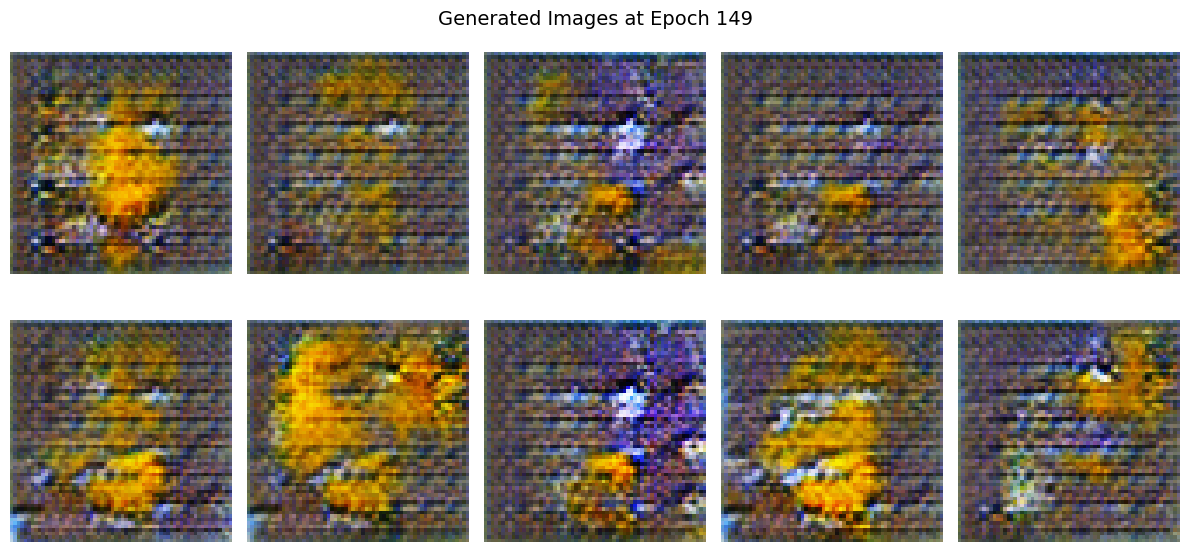


Epoch 151/170


100%|██████████| 154/154 [00:04<00:00, 38.12it/s]


d_loss_real: 1.2892, d_loss_fake: 1.2893, g_loss: 380.5197

Epoch 152/170


100%|██████████| 154/154 [00:04<00:00, 38.05it/s]


d_loss_real: 1.2841, d_loss_fake: 1.2841, g_loss: 381.2495

Epoch 153/170


100%|██████████| 154/154 [00:04<00:00, 38.36it/s]


d_loss_real: 1.2789, d_loss_fake: 1.2789, g_loss: 384.0772

Epoch 154/170


100%|██████████| 154/154 [00:04<00:00, 38.04it/s]


d_loss_real: 1.2847, d_loss_fake: 1.2846, g_loss: 388.4498

Epoch 155/170


100%|██████████| 154/154 [00:04<00:00, 38.33it/s]


d_loss_real: 1.2834, d_loss_fake: 1.2834, g_loss: 391.1800

Epoch 156/170


100%|██████████| 154/154 [00:04<00:00, 38.23it/s]


d_loss_real: 1.2812, d_loss_fake: 1.2812, g_loss: 392.6064

Epoch 157/170


100%|██████████| 154/154 [00:04<00:00, 38.42it/s]


d_loss_real: 1.3193, d_loss_fake: 1.3193, g_loss: 396.7019

Epoch 158/170


100%|██████████| 154/154 [00:03<00:00, 38.63it/s]


d_loss_real: 1.3216, d_loss_fake: 1.3217, g_loss: 398.9214

Epoch 159/170


100%|██████████| 154/154 [00:04<00:00, 38.47it/s]


d_loss_real: 1.3236, d_loss_fake: 1.3236, g_loss: 400.7483

Epoch 160/170


100%|██████████| 154/154 [00:03<00:00, 38.57it/s]

d_loss_real: 1.3227, d_loss_fake: 1.3227, g_loss: 402.3485
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


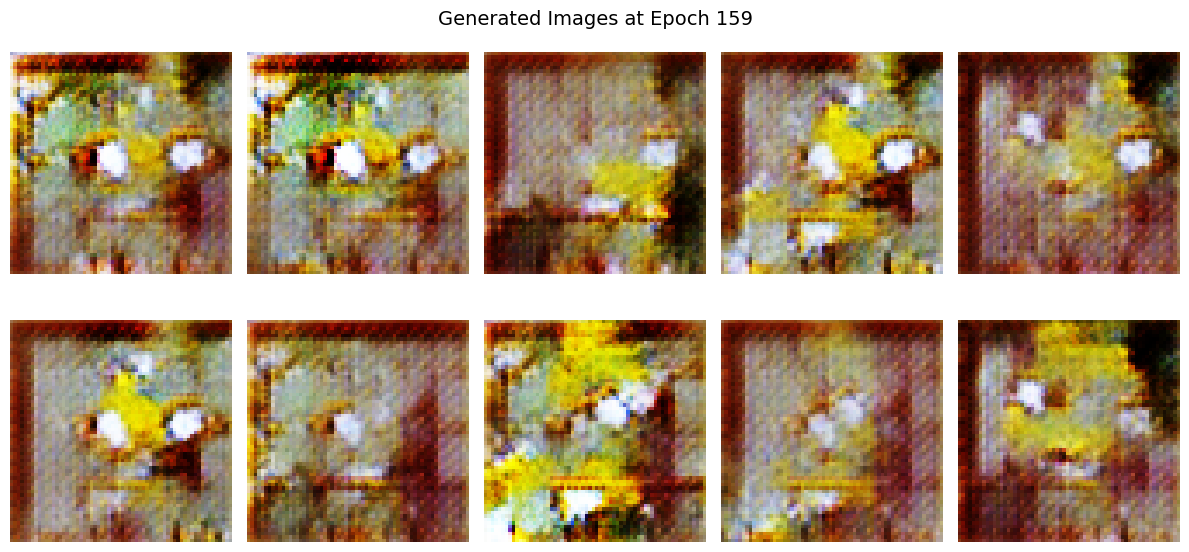


Epoch 161/170


100%|██████████| 154/154 [00:04<00:00, 36.99it/s]


d_loss_real: 1.3205, d_loss_fake: 1.3205, g_loss: 403.7019

Epoch 162/170


100%|██████████| 154/154 [00:04<00:00, 37.02it/s]


d_loss_real: 1.3172, d_loss_fake: 1.3175, g_loss: 405.3518

Epoch 163/170


100%|██████████| 154/154 [00:04<00:00, 37.02it/s]


d_loss_real: 1.3160, d_loss_fake: 1.3160, g_loss: 407.3546

Epoch 164/170


100%|██████████| 154/154 [00:04<00:00, 36.98it/s]


d_loss_real: 1.3120, d_loss_fake: 1.3120, g_loss: 409.1894

Epoch 165/170


100%|██████████| 154/154 [00:04<00:00, 36.97it/s]


d_loss_real: 1.3069, d_loss_fake: 1.3069, g_loss: 411.2676

Epoch 166/170


100%|██████████| 154/154 [00:04<00:00, 37.00it/s]


d_loss_real: 1.3823, d_loss_fake: 1.3823, g_loss: 419.2183

Epoch 167/170


100%|██████████| 154/154 [00:04<00:00, 36.92it/s]


d_loss_real: 1.3906, d_loss_fake: 1.3906, g_loss: 421.3634

Epoch 168/170


100%|██████████| 154/154 [00:04<00:00, 37.05it/s]


d_loss_real: 1.3904, d_loss_fake: 1.3904, g_loss: 423.1182

Epoch 169/170


100%|██████████| 154/154 [00:04<00:00, 36.87it/s]


d_loss_real: 1.3918, d_loss_fake: 1.3918, g_loss: 426.0477

Epoch 170/170


100%|██████████| 154/154 [00:04<00:00, 37.17it/s]

d_loss_real: 1.3904, d_loss_fake: 1.3904, g_loss: 427.9178
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


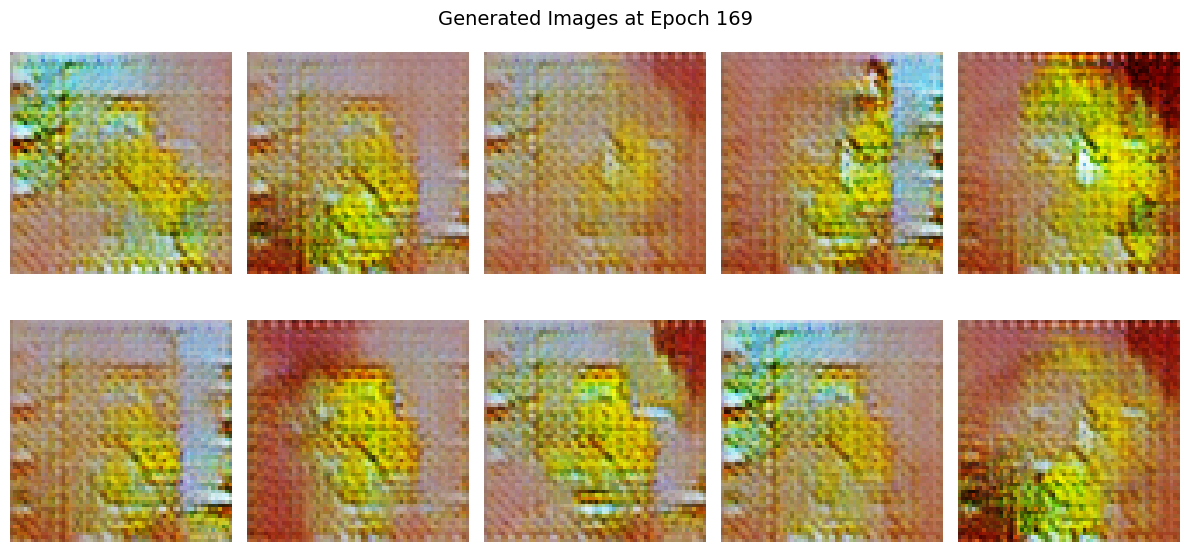

Training is complete.


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


with tf.device("/gpu:0"):
    for epoch in range(epochs):
        print(f"\nEpoch {epoch+1}/{epochs}")
        for i in tqdm(range(train.shape[0] // batch_size)):


            noise = np.random.normal(0, 1, (batch_size, noise_size))
            gen_img = generator.predict_on_batch(noise)

            
            real_imgs = train[i*batch_size:(i+1)*batch_size]
            
            #training discriminator on real images
            real_labels = np.ones((batch_size, 1))
            discriminator.trainable = True
            d_loss_real = discriminator.train_on_batch(real_imgs, real_labels)

            # training discriminator on fake images
            fake_labels = np.zeros((batch_size, 1))
            d_loss_fake = discriminator.train_on_batch(gen_img, fake_labels)
    
            #Training Generator
            noise = np.random.normal(0, 1, (batch_size, noise_size))
            valid_y = np.ones((batch_size, 1))
            discriminator.trainable = False
            g_loss = GAN.train_on_batch(noise, valid_y)

        print(f"d_loss_real: {d_loss_real:.4f}, d_loss_fake: {d_loss_fake:.4f}, g_loss: {g_loss:.4f}")

    
        if (epoch + 1) % 10 == 0:
            noise = np.random.normal(0, 1, (10, noise_size))
            gen_images = generator.predict(noise)

            gen_images = (gen_images + 1) / 2.0

            plt.figure(figsize=(12, 6))
            for i in range(10):
                plt.subplot(2, 5, i + 1)
                plt.imshow(gen_images[i])
                plt.axis("off")
            plt.tight_layout()
            plt.suptitle(f"Generated Images at Epoch {epoch}", fontsize=14)
            plt.show()

print("Training is complete.")


2025-06-20 15:29:13.315239: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 662.00MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


1/4 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step

2025-06-20 15:29:13.740709: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 572.75MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step


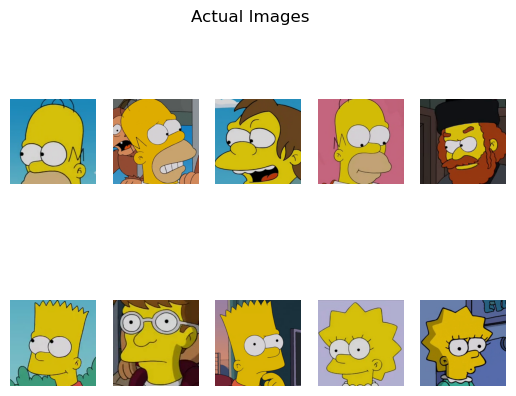

In [15]:
noise=np.random.normal(loc=0, scale=1, size=(100,noise_size))

gen_image = generator.predict(noise)

fig,axe=plt.subplots(2,5)
fig.suptitle("Actual Images")
idx = 0 
for i in range(2):
    for j in range(5):
        img_array = np.array(Image.open(img[idx]))
        axe[i,j].imshow(img_array)
        axe[i,j].axis("off")
        idx+=10

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

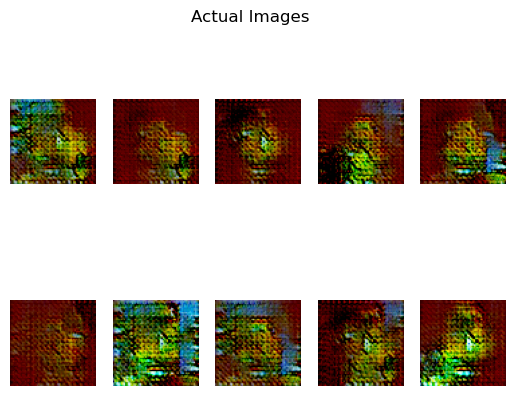

In [16]:
noise=np.random.normal(loc=0, scale=1, size=(100,noise_size))

gen_image = generator.predict(noise)

fig,axe=plt.subplots(2,5)
fig.suptitle("Actual Images")
idx = 0 
for i in range(2):
    for j in range(5):
        axe[i,j].imshow(np.array(gen_image[idx]))
        axe[i,j].axis("off")
        idx+=10
